<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
    Artificial Intelligence <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 4 - Machine Learning - Classification <br>
<font color=0CBCDF size=4>
   &#x1F335; Amirhossein Akbari  &#x1F335;
</div>

____

<font color=9999FF size=4>
&#x1F388; Full Name : Amirardalan Dehghanpour
<br>
<font color=9999FF size=4>
&#x1F388; Student Number : 401105901

1. <font color=red size=3>**Run All Cells Before Submission**</font>: <font color=FF99CC size=2>Before saving and submitting your notebook, please ensure you run all cells from start to finish. This practice guarantees that your notebook is self-consistent and can be evaluated correctly by others.</font>

2. <font color=red size=3>**Model Evaluation and Scoring Criteria**</font>: <font color=FF99CC size=2>To receive full marks for a model implementation, the accuracy of your custom model must be within 5 percentage points of the corresponding scikit-learn model's accuracy. Should your model's accuracy fall more than <mark>5 percentage</mark> points below that of the scikit-learn model, or if the scikit-learn model's accuracy is below 80%, points will be deducted accordingly.</font>

<font color=0080FF size=3>
This Jupyter Notebook is dedicated to exploring a classification task focused on predicting traveler satisfaction levels with airline services. In our scenario, we aim to classify whether a passenger is satisfied or not based on various features related to their travel experience. To tackle this task, we will develop and compare three different machine learning models:
</font>
<br>

1. **Naive Bayes Classifier**: <font color=66B2FF size=2>We'll start by implementing a Naive Bayes classifier without the use of high-level libraries, understanding its mechanics and applying it to our dataset.</font>

2. **Decision Tree Classifier**: <font color=66B2FF size=2>Next, we will build a Decision Tree model from the ground up, enabling us to delve into how decisions are made and splits are performed based on the data.</font>

<font color=0080FF size=3>
For each model, we'll go through the process of data preprocessing, model training, and evaluation to compare their performance. By the end of this notebook, you should have a clear understanding of these models' workings and their effectiveness in predicting airline passenger satisfaction.
</font>

<font color=#ffb578 size=3>
you are free to modify, add, or remove any cells as you see fit to complete your tasks. Feel free to change any of the provided code or content to better suit your understanding and approach to the problems.

- **Questions**: If you have any questions or require clarifications as you work through the notebook, please do not hesitate to ask. You can post your queries on Quera or reach out via Telegram.
- **Feedback**: We encourage you to seek feedback and engage in discussions to enhance your learning experience and improve your solutions.
</font>

Importing necessary libraries

In [67]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

Before proceeding, please execute the cell below to download the dataset if you're using Kaggle or Colab; if running locally, utilize the dataset in the 'HW' folder.

In [68]:
current_path = os.getcwd()
data_url = "https://www.dropbox.com/scl/fi/75xu0qz933plnpid1uplz/AI-HW4-Q2-Data.csv?rlkey=47o5ksm1qyoabswahequk7t1d&dl=0"
data_path = os.path.join(current_path, "data.csv")
!wget -q -O "{data_path}" "{data_url}"

# Data Exploration (5 point)
In this section, we perform some data exploration to get a better understanding of the data.

## Task1: Load and Inspect the Dataset (2 point)
Load the train dataset as a dataframe and show the first 10 rows of the dataframe

In [69]:
# Load dataset and display the first 10 rows
# TODO

train_df = pd.read_csv(data_path)
# Display the first 10 rows of the DataFrame
print(train_df.head(10))

       Customer Type   Type of Travel     Class  Flight Distance  \
0     Loyal Customer  Business travel  Business             1727   
1     Loyal Customer  Personal Travel       Eco             1546   
2  disloyal Customer  Business travel       Eco             1086   
3     Loyal Customer  Business travel  Business             2644   
4     Loyal Customer  Business travel       Eco              302   
5     Loyal Customer  Business travel       Eco              125   
6     Loyal Customer  Business travel  Business              248   
7  disloyal Customer  Business travel       Eco              547   
8     Loyal Customer  Business travel  Eco Plus              472   
9     Loyal Customer  Business travel  Business             2875   

   Inflight wifi service  Ease of Online booking  Online boarding  \
0                      1                       1                4   
1                      3                       3                3   
2                      5                    

## Task 2: Dataset Overview (4 point)
Perform an initial exploration of the dataset to understand its structure, including the number of features, rows, and the types of data (numerical or categorical) it contains. Use methods like [.info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) and [.describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) for this purpose.

In [70]:
# TODO: Use df.shape to print the number of rows and columns in the dataset.
# - Display the shape of the dataset (number of rows and columns)
print(train_df.shape)
print(train_df.info())
# TODO: Use df.info() to provide a summary of the dataframe, focusing on non-null counts and data types for each column.
# - Display a concise summary of the dataframe, including the number of non-null values in each column

(25000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Customer Type           25000 non-null  object
 1   Type of Travel          25000 non-null  object
 2   Class                   25000 non-null  object
 3   Flight Distance         25000 non-null  int64 
 4   Inflight wifi service   25000 non-null  int64 
 5   Ease of Online booking  25000 non-null  int64 
 6   Online boarding         25000 non-null  int64 
 7   Seat comfort            25000 non-null  int64 
 8   Inflight entertainment  25000 non-null  int64 
 9   satisfaction            25000 non-null  object
dtypes: int64(6), object(4)
memory usage: 1.9+ MB
None


## Task 3: Distribution and Analysis (4 point)
Visualize the distribution of both numerical and categorical features in the dataset using [histograms](https://matplotlib.org/stable/gallery/statistics/hist.html) for numerical data and [bar charts](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) for categorical data. Analyze these distributions to identify any patterns, outliers, or anomalies in the data.

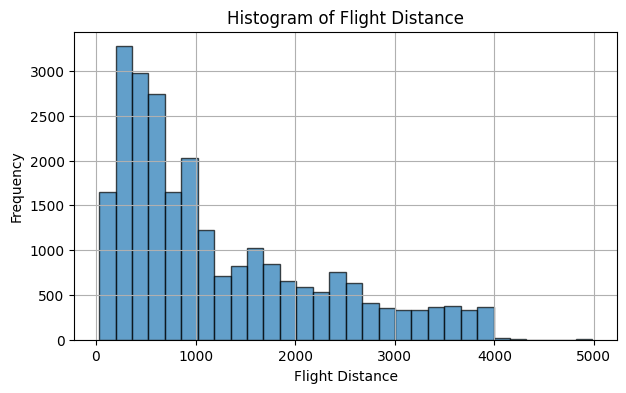

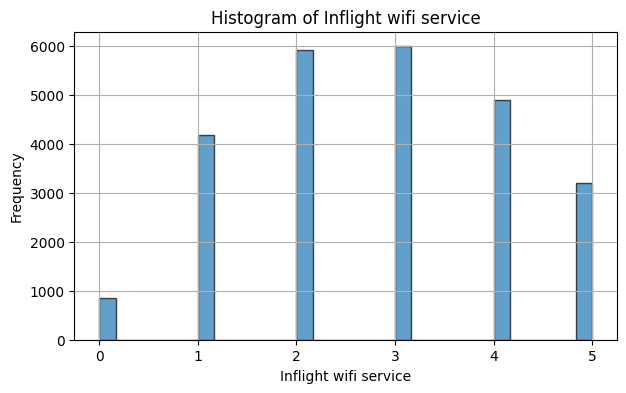

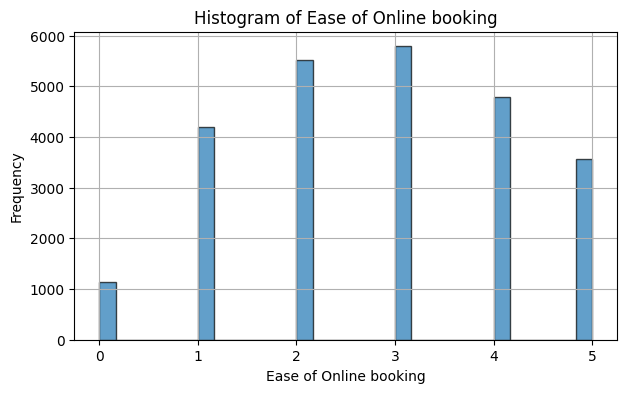

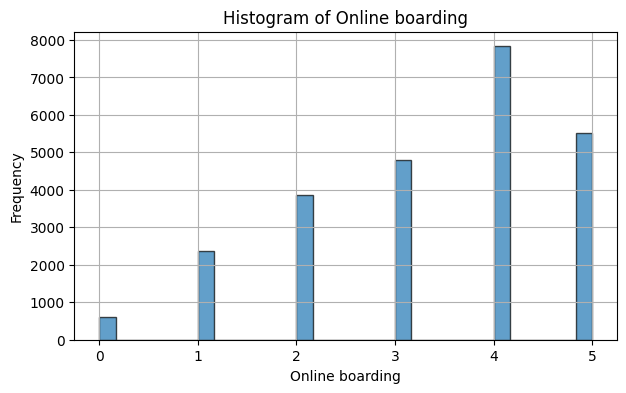

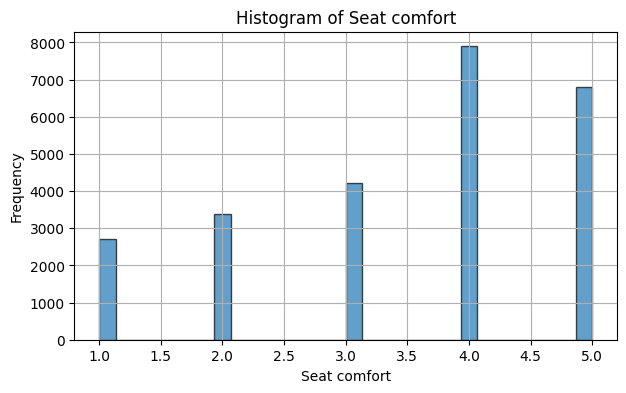

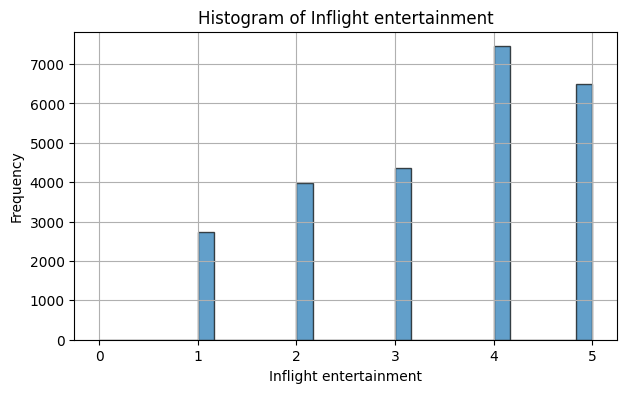

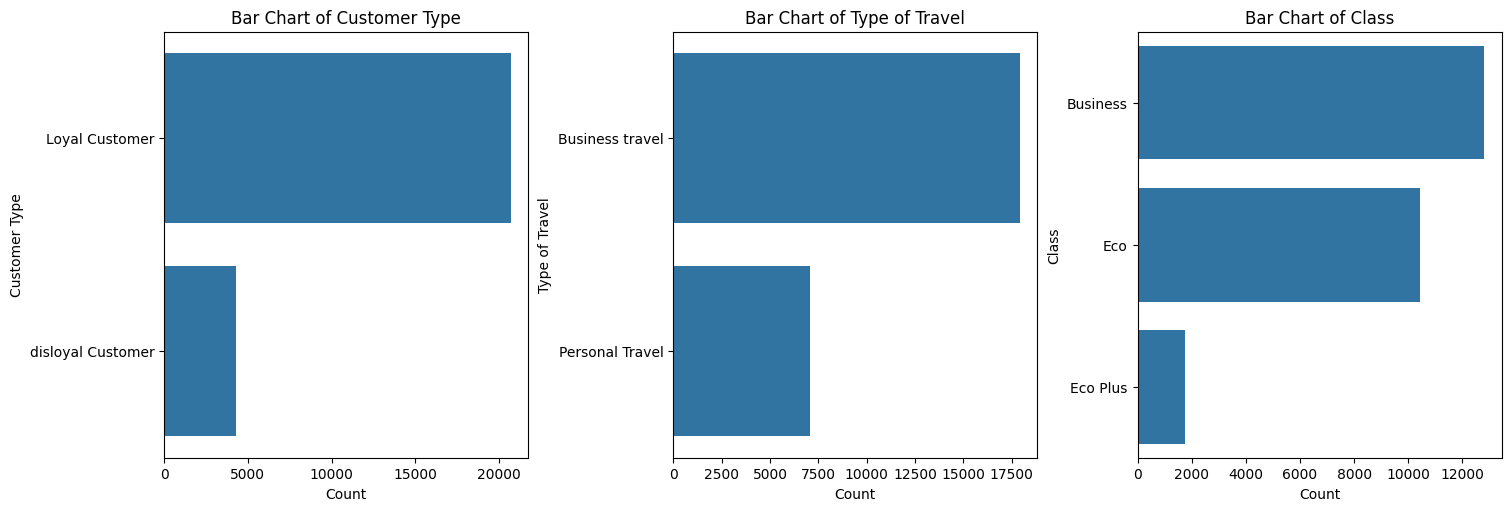

In [71]:
# TODO: Plot Distributions for Numerical Features
# - Identify and separate numerical columns.
# - Determine the layout dimensions for subplots based on the number of numerical columns.
# - Use histograms to visualize the distribution of each numerical feature.


numerical_cols = train_df.select_dtypes(include=['number']).columns
for col in numerical_cols:
  plt.figure(figsize=(7, 4))
  plt.hist(train_df[col], bins=30, edgecolor='k', alpha=0.7)
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.grid(True)
  plt.show()

categorical_cols = train_df.select_dtypes(include=['object', 'category']).columns
categorical_cols = categorical_cols.drop('satisfaction', errors='ignore')
num_cats = len(categorical_cols)
fig, axes = plt.subplots(1, num_cats, figsize=(15, 5), constrained_layout=True)

for ax, col in zip(axes, categorical_cols):
    sns.countplot(y=train_df[col], ax=ax)  # Use `y` to make the bar chart horizontal
    ax.set_title(f'Bar Chart of {col}')
    ax.set_xlabel('Count')
    ax.set_ylabel(col)


# TODO: Visualize Categorical Features
# - Exclude the target variable "satisfaction" and identify categorical columns.
# - Calculate layout dimensions for subplots based on the number of categorical columns.
# - Use bar charts to show the distribution of each categorical feature, adjusting subplot dimensions as needed.

# Pre-processing (15 pint)
In this section, we perform some pre-processing to make the data ready for models.

## Task 1: Handling Missing Values (2 point)
In this task, we will handle missing values by [dropping](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) records that contain missing values.

In [72]:
# TODO: Remove any rows in the dataset that contain missing values.
train_df=train_df.dropna()

## Task 2: Converting Categorical Variables to Numeric (7 point)
We will use [one-hot encoding](https://www.kdnuggets.com/2023/07/pandas-onehot-encode-data.html) to convert categorical variables into a format that can be provided to ML algorithms. Also convert the categorical target variable 'satisfaction' into numeric format, where 'satisfied' is mapped to 1 and 'neutral or dissatisfied' is mapped to 0.

In [73]:
# TODO: Apply one-hot encoding to convert categorical variables into a numeric format suitable for machine learning models.
categorical_cols = train_df.select_dtypes(include=['object', 'category']).columns
categorical_cols = categorical_cols.drop('satisfaction')
# Apply one-hot encoding
df_encoded = pd.get_dummies(train_df, columns=categorical_cols)
df_encoded['satisfaction_numeric'] = df_encoded['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})
df_encoded.drop('satisfaction', axis=1, inplace=True)
# TODO: Convert the target variable 'satisfaction' into binary numeric format, where 'satisfied' is mapped to 1 and 'neutral or dissatisfied' is mapped to 0.

## Task 3: Splitting the Data into Training and Test Sets(6 point)
Finally, [split your data](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) into training and test sets. This is a critical step for training and evaluating the performance of your models.

In [74]:
# Prepare data for model training
# TODO: Separate features and the target variable. Ensure all features are in an integer format.

# TODO: Split the dataset into training and testing sets using an 80-20 split.
X = df_encoded.drop(columns=['satisfaction_numeric'])  # Features: All columns except 'satisfaction'
y = df_encoded['satisfaction_numeric']  # Target: 'satisfaction' column

# Ensure all features are in an integer format
# If any features are not in integer format, you can convert them using appropriate methods

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
# TODO: Print the shapes of the training and testing datasets to verify the split.

Training set shape: (20000, 13) (20000,)
Testing set shape: (5000, 13) (5000,)


<font size=3>
Now that our data is prepared and we have separate training and testing datasets, along with the necessary preprocessing completed, we are ready to move on to the model building and training phase. We will start with the Naive Bayes classifier, which is our first model in this series of experiments.

# Naive Bayes Classifier (25 point)

## Task 1: Implement Naive Bayes Classifier from Scratch (15 point)
In this task, you will implement the [Naive Bayes Classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) from scratch. This will involve calculating the prior probabilities for each class, the likelihood of the data given the class, and using these to calculate the posterior probabilities for the prediction.


[This video](https://www.youtube.com/watch?v=O2L2Uv9pdDA) will be helpful too.
Especially [this model](https://www.youtube.com/watch?v=H3EjCKtlVog).


In [75]:
import math
from scipy.stats import norm
class NaiveBayesClassifier:
    def __init__(self):
        """
        Initialize the Naive Bayes Classifier with dictionaries for means, variances,
        and priors of each class.

        Inputs:
        None
        Outputs:
        An instance of the NaiveBayesClassifier with initialized storage for model parameters.
        """
        #############################################################################
        #                    TODO: Initialize the classifier
        self.stats_dict={}
        self.probablity1=0
        self.probablity0=0
        #############################################################################

    def fit(self, X, y):
        """
        Fit the Naive Bayes Classifier according to X, a dataset with features, and y,
        the corresponding labels.

        Inputs:
        - X: A 2D numpy array of shape (n_samples, n_features) representing the training data.
        - y: A 1D numpy array of shape (n_samples,) representing the class labels for each
             training sample.
        Outputs:
        None, but the fit method updates the classifier's parameters (mean, var, priors) based
        on the training data.
        """
        #############################################################################
        #                    TODO: Fit the model to the data                        #
        counts = np.bincount(y)
        self.probablity1=math.log(counts[1]/y.shape[0])
        self.probablity0=math.log(counts[0]/y.shape[0])
        X_numpy = X
        y_numpy=y
        y_reshaped = y_numpy.reshape(-1, 1)
        data_with_y = np.hstack((X_numpy, y_reshaped))
        data_y0 = data_with_y[y_train == 0]
        data_y1 = data_with_y[y_train == 1]
        for i in range(0,X_numpy.shape[1]):
          col = data_y0[:, i]
          if type(col[0])==int:
            column_data0 = data_y0[:, i]
            column_data1 = data_y1[:, i]
            self.stats_dict[X_train.columns[i]]={}
            self.stats_dict[X_train.columns[i]]['mean[0]']= np.mean(column_data0)
            self.stats_dict[X_train.columns[i]]['mean[1]']= np.mean(column_data1)
            self.stats_dict[X_train.columns[i]]['var[0]']= np.var(column_data0)
            self.stats_dict[X_train.columns[i]]['var[1]']= np.var(column_data1)
          elif type(col[0])==bool:
            bool_column_data0 = data_y0[:, i]
            bool_column_data1 = data_y1[:, i]
            self.stats_dict[X_train.columns[i]]={}
            self.stats_dict[X_train.columns[i]]['true|y=0']= np.sum(bool_column_data0)/data_y0.shape[0]
            self.stats_dict[X_train.columns[i]]['true|y=1']= np.sum(bool_column_data1)/data_y1.shape[0]

        #############################################################################
    def gaussian_pdf(self, class_idx, x):
        """
        Calculate the Gaussian probability density function for a given class index and a single sample.

        Inputs:
        - class_idx: The index of the class for which the probability is calculated.
        - x: A 1D numpy array of feature values for a single sample.

        Outputs:
        - The probability of x given the class index, computed using the Gaussian PDF.

        Note: This function is specific to Gaussian Naive Bayes. If another variant of Naive Bayes
        is used (e.g., Multinomial Naive Bayes), this function may not be necessary and can be omitted.
        """
        #############################################################################
        #                TODO: Implement the Gaussian PDF calculation               #
        if type(x[class_idx] == int):
          mean=0
          var=0
          pdf=0
          mean1=self.stats_dict[X_train.columns[class_idx]]['mean[1]']
          std1=math.sqrt(self.stats_dict[X_train.columns[class_idx]]['var[1]'])
          mean0=self.stats_dict[X_train.columns[class_idx]]['mean[0]']
          std0=math.sqrt(self.stats_dict[X_train.columns[class_idx]]['var[0]'])

          pdf1 = norm.pdf(x[class_idx], loc=mean1, scale=std1)
          pdf0 = norm.pdf(x[class_idx], loc=mean0, scale=std0)
        return pdf1,pdf0
        #############################################################################
        pass

    def predict(self, X):
        """
        Perform classification on an array of test vectors X.

        Inputs:
        - X: A 2D numpy array of shape (n_samples, n_features) representing the test data.

        Outputs:
        - A 1D numpy array of shape (n_samples,) containing the predicted class labels for each
          test sample.
        """
        #############################################################################
        #                TODO: Implement the prediction function                    #
        y=np.zeros(X.shape[0])
        for i in range(0,y.shape[0]):
          prob1=self.probablity1
          prob0=self.probablity0
          for j in range(0,X.shape[1]):
            column_dtype = X_test.iloc[0, j].dtype
            if column_dtype == 'int64':
              pdf1 = norm.pdf(X[i][j], loc=self.stats_dict[X_test.columns[j]]['mean[1]'], scale=math.sqrt(self.stats_dict[X_test.columns[j]]['var[1]']))
              prob1  += math.log(pdf1)
              pdf0 = norm.pdf(X[i][j], loc=self.stats_dict[X_test.columns[j]]['mean[0]'], scale=math.sqrt(self.stats_dict[X_test.columns[j]]['var[0]']))
              prob0  += math.log(pdf0)
            elif column_dtype == bool:
              if(X[i][j]==True):
                prob1 += math.log(self.stats_dict[X_test.columns[j]]['true|y=1'])
                prob0 += math.log(self.stats_dict[X_test.columns[j]]['true|y=0'])
              elif(X[i][j]==False):
                prob1 += math.log(1-self.stats_dict[X_test.columns[j]]['true|y=1'])
                prob0 += math.log(1-self.stats_dict[X_test.columns[j]]['true|y=0'])

          if prob1 >=prob0 :
            y[i]=1
          else:
            y[i]=0


        return y


        #############################################################################
        pass


## Task 2: Train Naive Bayes Model from Scratch (2 point)
Instantiate the NaiveBayesClassifier class and fit it to the training data.

In [76]:
# Instantiate the NaiveBayesClassifier and train it with the training dataset
# TODO: Create an instance of NaiveBayesClassifier and fit it to the training data using the fit method.
nb=NaiveBayesClassifier()
input_X=X_train.values
input_y=y_train.values
nb.fit(input_X,input_y)
y_pred_test = nb.predict(X_test.values)


## Task 3: Train Naive Bayes Model Using scikit-learn (5 point)
Utilize the [Naive Bayes class from scikit-learn](https://scikit-learn.org/stable/modules/naive_bayes.html) to train a Naive Bayes model on the same dataset.

In [77]:
# Initialize and train a Gaussian Naive Bayes model using scikit-learn
# TODO: Use scikit-learn's GaussianNB to create and fit a model to the training dataset.
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred_test_sklearn = model.predict(X_test)

## Task 4: Evaluate and Compare Both Models (3 point)
Evaluate both the custom-built Naive Bayes model and the scikit-learn model. The primary metric for comparison is accuracy, which is sufficient for earning full points on this task. Optionally, you can also use a [confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) to further analyze and compare their performance in terms of [accuracy, precision, recall, and F1 score](https://www.labelf.ai/blog/what-is-accuracy-precision-recall-and-f1-score).
Please note that while the main focus is on comparing the accuracy, the output you see in this cell will be a confusion matrix if you choose to include additional metrics. This is encouraged as it provides a more comprehensive view of model performance but is not mandatory for meeting the basic requirements of the task.

In [78]:
# TODO: Predict and Evaluate Custom Naive Bayes Classifier
# - Predict test labels with the NaiveBayesClassifier instance.
# - Convert numerical labels to class names for comparison.
# - Use confusion matrix and classification report for model evaluation.

# TODO: Predict and Evaluate Scikit-learn Gaussian Naive Bayes Model
# - Make predictions on the test set using scikit-learn's GaussianNB.
# - Translate numerical labels to class names for intuitive comparison.
# - Assess the model's effectiveness with confusion matrix and classification report, noting differences with the custom model.
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix

print("Confusion matrix for Scratch")
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(conf_matrix)
print("Classification report for Scratch")
print(classification_report(y_test, y_pred_test))

print("Confusion matrix for Sklearn")
conf2_matrix = confusion_matrix(y_test, y_pred_test_sklearn)
print(conf2_matrix)
print("Classification report for Scratch")
print(classification_report(y_test, y_pred_test_sklearn))

Confusion matrix for Scratch
[[2059  425]
 [ 344 2172]]
Classification report for Scratch
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      2484
           1       0.84      0.86      0.85      2516

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000

Confusion matrix for Sklearn
[[2048  436]
 [ 410 2106]]
Classification report for Scratch
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      2484
           1       0.83      0.84      0.83      2516

    accuracy                           0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000



# Decision tree Classifier (25 point)

## Task 1: Implement Decision Tree Classifier from Scratch (15 point)
In this task, you are to implement a [Decision Tree Classifier](https://en.wikipedia.org/wiki/Decision_tree) entirely from scratch. The core framework of the classifier has been outlined for you, including several helper methods that you might find useful. These methods are intended to guide your implementation and provide a structured way to approach the problem.You are not strictly bound to the provided private methods (`_compute_entropy`, `_split_data`, etc.). If you find a more efficient or clearer way to implement these functionalities, you are encouraged to adjust the methods accordingly.

[This video](https://www.youtube.com/watch?v=_L39rN6gz7Y) will be helpful too.

In [79]:
class DecisionTreeClassifier:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1, criterion='gini'):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.criterion = criterion
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def predict(self, X):
        return np.array([self._predict_sample(self.tree, sample) for sample in X])

    def _compute_entropy(self, y):
        if len(y) == 0:
            return 0
        class_counts = np.bincount(y)
        probabilities = class_counts / len(y)
        entropy = -np.sum([p * np.log2(p) for p in probabilities if p > 0])
        return entropy

    def _compute_gini(self, y):
        if len(y) == 0:
            return 0
        class_counts = np.bincount(y)
        probabilities = class_counts / len(y)
        gini = 1 - np.sum(probabilities ** 2)
        return gini

    def _compute_criterion(self, y):
        if self.criterion == 'gini':
            return self._compute_gini(y)
        elif self.criterion == 'entropy':
            return self._compute_entropy(y)
        else:
            raise ValueError("Criterion must be 'gini' or 'entropy'")

    def _split_data(self, X, y, feature_index, threshold):
        left = X[:, feature_index] <= threshold
        right = X[:, feature_index] > threshold
        return X[left], X[right], y[left], y[right]

    def _find_best_split(self, X, y):
        best_gain = -1
        best_feature_index = None
        best_threshold = None
        base_criterion = self._compute_criterion(y)
        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                X_left, X_right, y_left, y_right = self._split_data(X, y, feature_index, threshold)
                if len(y_left) < self.min_samples_leaf or len(y_right) < self.min_samples_leaf:
                    continue

                p = len(y_left) / len(y)
                criterion = p * self._compute_criterion(y_left) + (1 - p) * self._compute_criterion(y_right)
                gain = base_criterion - criterion

                if gain > best_gain:
                    best_gain = gain
                    best_feature_index = feature_index
                    best_threshold = threshold
        return best_feature_index, best_threshold

    def _build_tree(self, X, y, depth):
        num_samples_per_class = [np.sum(y == i) for i in np.unique(y)]
        predicted_class = np.argmax(num_samples_per_class)
        node = {
            'predicted_class': predicted_class,
            'criterion_value': self._compute_criterion(y),
            'num_samples': len(y),
            'num_samples_per_class': num_samples_per_class,
            'feature_index': None,
            'threshold': None,
            'left': None,
            'right': None
        }

        if depth < self.max_depth and len(y) >= self.min_samples_split and node['criterion_value'] > 0:
            best_feature_index, best_threshold = self._find_best_split(X, y)
            if best_feature_index is not None:
                X_left, X_right, y_left, y_right = self._split_data(X, y, best_feature_index, best_threshold)
                node['feature_index'] = best_feature_index
                node['threshold'] = best_threshold
                node['left'] = self._build_tree(X_left, y_left, depth + 1)
                node['right'] = self._build_tree(X_right, y_right, depth + 1)
        return node

    def _predict_sample(self, node, sample):
        if node['left'] is None and node['right'] is None:
            return node['predicted_class']
        if sample[node['feature_index']] <= node['threshold']:
            return self._predict_sample(node['left'], sample)
        else:
            return self._predict_sample(node['right'], sample)



## Task 2: Train Decision Tree Model from Scratch (2 point)
Instantiate the DecisionTree class and fit it to the training data.

In [80]:
# Create and train a Decision Tree model with a maximum depth of 5
# TODO: Instantiate the DecisionTreeClassifier with max_depth=5 and fit it to the training data.
X_decision=X_train.values
y_decision=y_train.values
dtree=DecisionTreeClassifier(max_depth=5,min_samples_split=2, min_samples_leaf=1)
dtree.fit(X_decision,y_decision)
X_test_numpy=X_test.values
y_pred = dtree.predict(X_test_numpy)
#accuracy = accuracy_score(y_test, y_pred)

## Task 3: Train Decision Tree Model Using scikit-learn (5 point)
Utilize the [Decision Tree class from scikit-learn](https://scikit-learn.org/stable/modules/tree.html) to train a Decision Tree model on the same dataset.

In [81]:
# Initialize and train a Decision Tree Classifier using scikit-learn
# TODO: Use scikit-learn's DecisionTreeClassifier to create a model with a specified random state and fit it to the training data.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred_scikit = clf.predict(X_test)

## Task 4: Evaluate and Compare Both Models (3 points)

Evaluate both the custom-built Decision Tree model and the scikit-learn model. The primary metric for comparison is accuracy, which is sufficient for earning full points on this task. Optionally, you can also use a confusion matrix to further analyze and compare their performance in terms of accuracy, precision, recall, and F1 score.
Please note that while the main focus is on comparing the accuracy, the output you see in this cell will be a confusion matrix if you choose to include additional metrics. This is encouraged as it provides a more comprehensive view of model performance but is not mandatory for meeting the basic requirements of the task.


In [82]:
# TODO: Predict and Evaluate Custom Decision Tree Model
# - Use the custom DecisionTreeClassifier to predict test labels.
# - Convert numerical labels to class names for both y_test and y_pred.
# - Evaluate the model's performance using confusion matrix and classification report.

# TODO: Predict and Evaluate Scikit-learn Decision Tree Model
# - Utilize scikit-learn's DecisionTreeClassifier for prediction on the test set.
# - Convert numerical labels to class names for y_pred_sklearn.
# - Assess the model with confusion matrix and classification report, comparing it against the custom model.
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix

print("Confusion matrix for Scratch")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print("Classification report for Scratch")
print(classification_report(y_test, y_pred))

print("Confusion matrix for Sklearn")
conf2_matrix = confusion_matrix(y_test, y_pred_scikit)
print(conf2_matrix)
print("Classification report for Scratch")
print(classification_report(y_test,y_pred_scikit))

Confusion matrix for Scratch
[[2310  174]
 [ 583 1933]]
Classification report for Scratch
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2484
           1       0.92      0.77      0.84      2516

    accuracy                           0.85      5000
   macro avg       0.86      0.85      0.85      5000
weighted avg       0.86      0.85      0.85      5000

Confusion matrix for Sklearn
[[2262  222]
 [ 197 2319]]
Classification report for Scratch
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2484
           1       0.91      0.92      0.92      2516

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000

